# Support Vector Machines (SVM)

In an N-dimensional space, a hyperplane is a flat affine subspace of dimension N-1. In 1D, the hyerplane is a single poing; in 2D, a hyperplane is a line, in 3D it is a flat plane, and in higher dimensions, it is a subspace.

The idea behind SVM is that we can use hyperplanes to separate classes. The new data points can be classified based on which side of the hyperplane they fall on.


## Support Vector Regression (SVR)

SVR is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

An SVM is a supervised machine learning algorithm used for classification and regression tasks. It aims to maximize the margin (the distance between the hyperplane and the nearest data points of each class) while minimizing classification errors. It’s widely used in tasks such as image classification, text categorization, and more.

In SVR, the goal is finding the best fit that accurately predicts the target variable while reducing complexity to avoid overfitting. 

SVR introduces the $ε$-insensitive loss function, which means that errors within a certain threshold (ε) are considered acceptable and do not incur any penalty. Only errors exceeding this threshold contribute to the loss, promoting a balance between model complexity and error minimization.

Some applications of SVR include:

- Financial Forecasting: Predicting stock prices, market trends, or economic indicators.
- Engineering: Modeling and predicting system behaviors, load forecasting, and signal processing.
- Environmental Science: Predicting weather patterns, pollution levels, or resource consumption.
- Bioinformatics: Gene expression analysis, protein structure prediction



### Concept (linear SVR)

*Note: the data isn't accurate, it's just a plot to help understanding the concept.*

- $ε$-insensitive tube / ($w$) hyperplane: it's the margin of error we're allowing in our predictions. 
    - Any prediction *within* this tube is considered acceptable. Predictions *outside* this tube are penalized
- Slack variables: these are the points that fall outside the $ε$-insensitive tube.
- $\xi$: is the distance between the prediction and the $ε$-insensitive tube (noted as $\xi_n^*$ if they are outiside the lower bound, and $\xi_n$ if they are outside the upper bound).

$$\frac{1}{2} ||w||^2 + C \sum_{n=1}^{N} (\xi_n + \xi_n^*)$$


#### Visualizing the concept

The area between the two dotted lines is the $ε$-insensitive tube. The solid line is the hyperplane that best fits the data. The points outside the tube are the slack variables.

The distance between the solid line and the dotted lines is the margin of error we're allowing in our predictions: in the visualization, no data points fall within the margin of error, while in a real-world scenario it can happen.

A soft margin is used to allow some data points to fall within the margin of error. This is controlled by the hyperparameter $C$. Cross-validation can be used to find the optimal value for $C$.

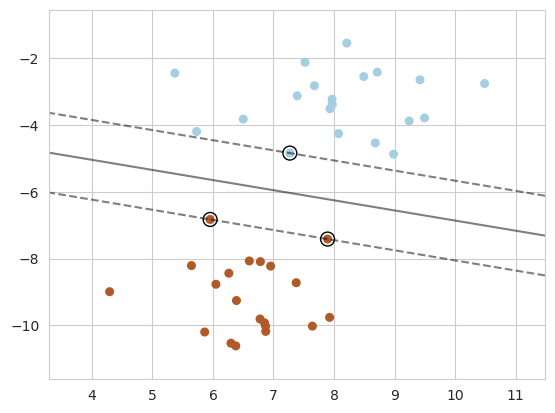

In [1]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

When classes cannot be split with the hyperplane, a *kernel* function can be used to map the data to a higher-dimensional space where it can be separated.

### Kernels and the Kernel Trick

The kernel trick is a method used to increase the dimensionality of the data to make it linearly separable.

There are several types of kernels, such as:

- Linear: used for linearly separable data.
- Polynomial: used for non-linear data.
- Radial Basis Function (RBF): used for non-linear data.
- Sigmoid: used for non-linear data.
- Custom: a user-defined kernel.

## SVR with Python

### Examples (SVR)

#### Example 1 - SVR (SVM classification)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('./data/mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

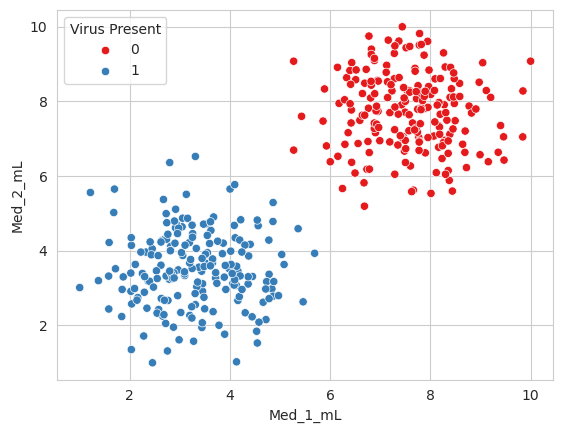

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='Set1')

Separating the hyperplane:

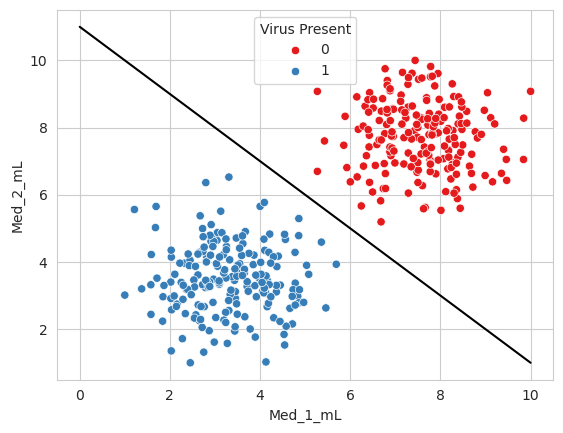

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='Set1',data=df)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

### Kernels and hyperparameter C

Linear kernel and hyperparameter C 1000

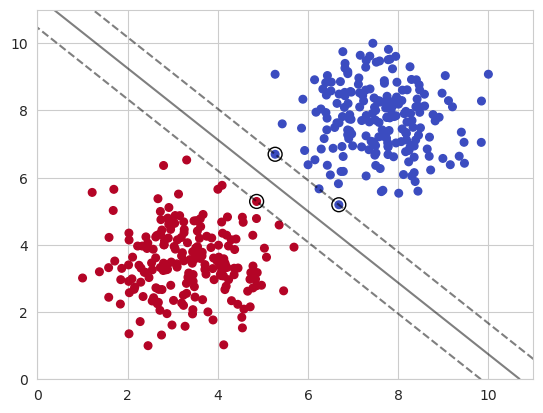

In [8]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Linear kernel and hyperparameter C 0.05

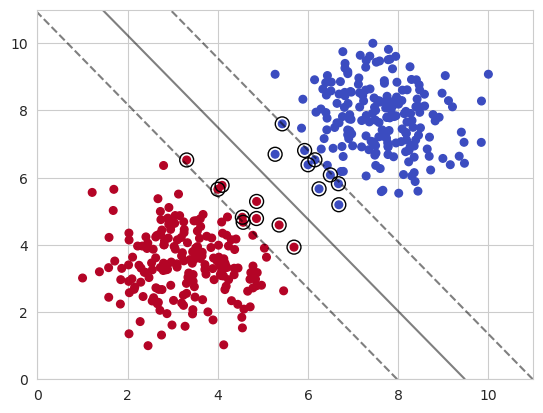

In [9]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=0.05)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

The `rbf` kernel is a good default choice for SVM models. It can handle complex data distributions and is suitable for most classification tasks.

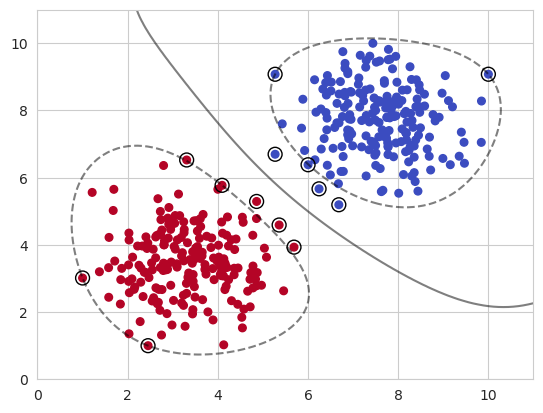

In [10]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="rbf", C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Sigmoid kernel

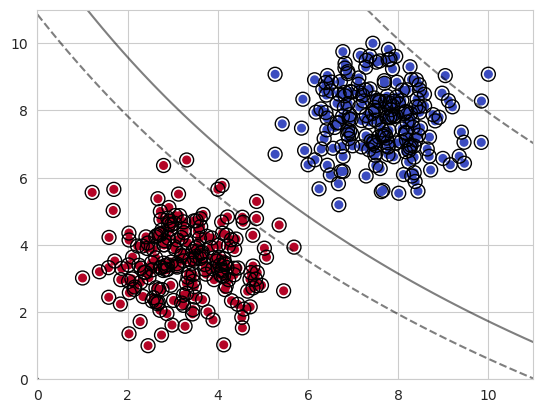

In [11]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="sigmoid")
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

#### Polynomial kernel functions

1 degree

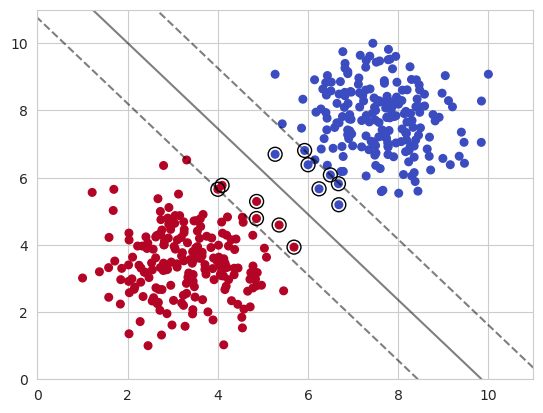

In [12]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="poly", C=1, degree=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

2 degrees

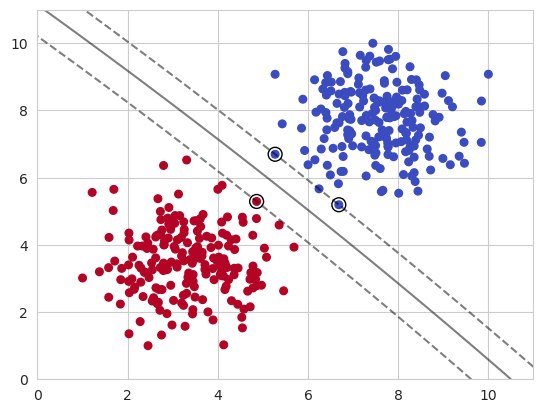

In [13]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="poly", C=1, degree=2)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Gamma kernel function:

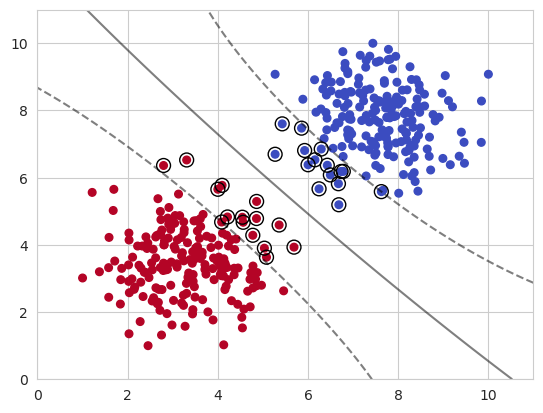

In [14]:
import matplotlib.pyplot as plt

from sklearn import svm
# from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

X = X.values
y = y.values

# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="rbf", C=1, gamma=0.01)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Grid search for hyperparameters:

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [23]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [24]:
grid.best_score_

np.float64(1.0)

In [25]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

#### Example 2 - SVR

In [78]:
df = pd.read_csv('./data/cement_slump.csv')

In [79]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [80]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<Axes: >

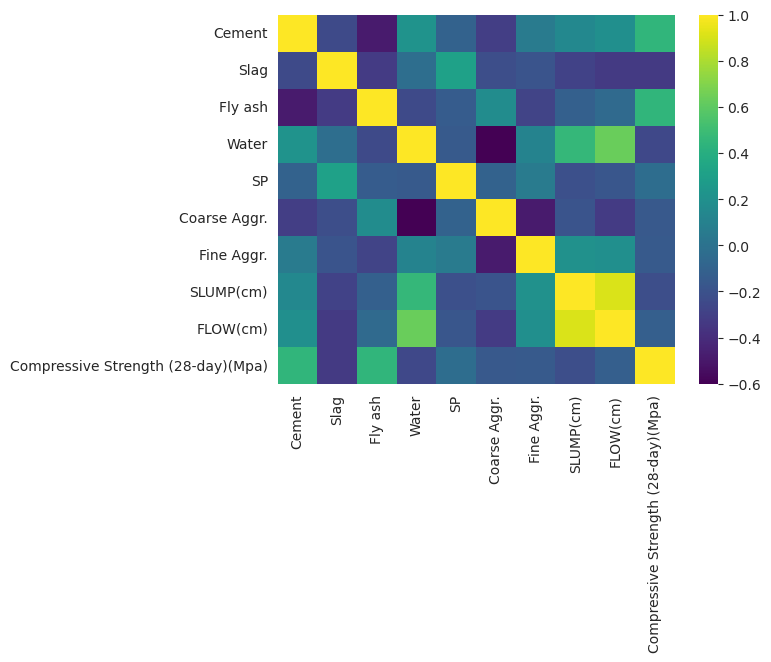

In [81]:
sns.heatmap(df.corr(),cmap='viridis')

In [82]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [83]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [89]:
from sklearn.svm import SVR

In [90]:
base_model = SVR()

In [91]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [92]:
base_preds = base_model.predict(scaled_X_test)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
mean_absolute_error(y_test,base_preds)

5.236902091259178

In [95]:
np.sqrt(mean_squared_error(y_test,base_preds))

np.float64(6.695914838327133)

In [96]:
y_test.mean()

np.float64(36.26870967741935)

In [97]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [100]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [101]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [102]:
grid_preds = grid.predict(scaled_X_test)

In [103]:
mean_absolute_error(y_test,grid_preds)

2.5128012210762365

In [104]:
np.sqrt(mean_squared_error(y_test,grid_preds))

np.float64(3.178210305119858)

#### Example 3 (SVR)

In [27]:
dataset = pd.read_csv('./data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [28]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

The `StandardScaler` expects a 2D array, so we need to reshape the one-dimensional array `y`: 

In [30]:
y = y.reshape(len(y), 1)

In [31]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

With SVR, we need to apply feature scaling because it doesn't have an implicit relation between the features and the target variable.

Additionally, the model will not be split into training and testing sets.

In this case: the values of x are much smaller than the values of y and this may cause the model to ignore the x values.

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [33]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [34]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Now we can train the SVR model.

sklearn will throw an error

In [35]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y.ravel())

SVR()

Predicting a new result:

In [36]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Plotting the results:

For the dots representing the data points:
- Convert the scaled `x` and `y` values back to their original values using the `inverse_transform` method `sc_x.inverse_transform(x), sc_y.inverse_transform(y)`

For the line:
- Same as above for `x`, but for `y`, we need to predict the values using the `regressor.predict(x)` method and reshape the array to a 2D array using `reshape(-1,1)`.

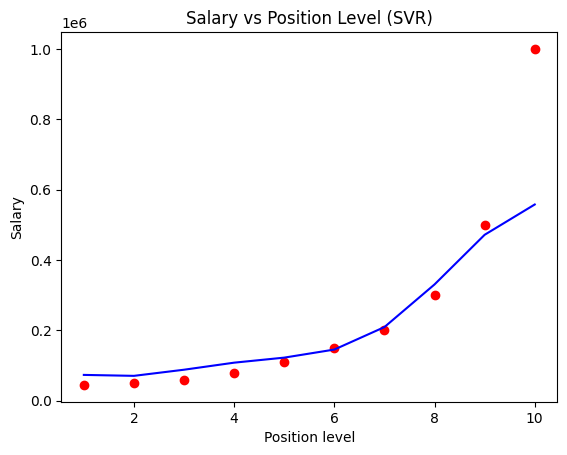

In [37]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Salary vs Position Level (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

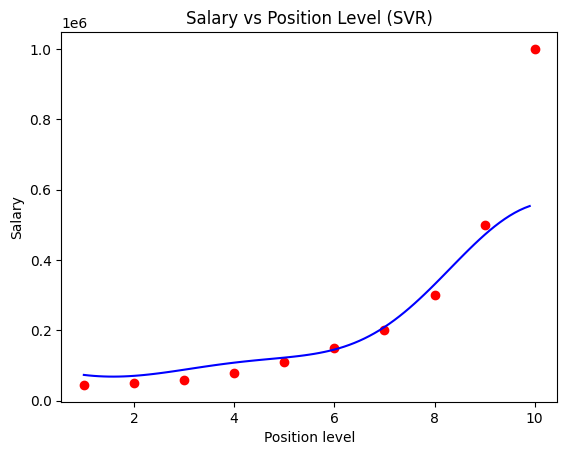

In [38]:
X_grid = np.arange(min(sc_X.inverse_transform(X))[0], max(sc_X.inverse_transform(X))[-1], 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Salary vs Position Level (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Example 4 (SVR)

In [176]:
df = pd.read_csv('./data/wine_fraud.csv')

In [177]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


<Axes: xlabel='quality', ylabel='count'>

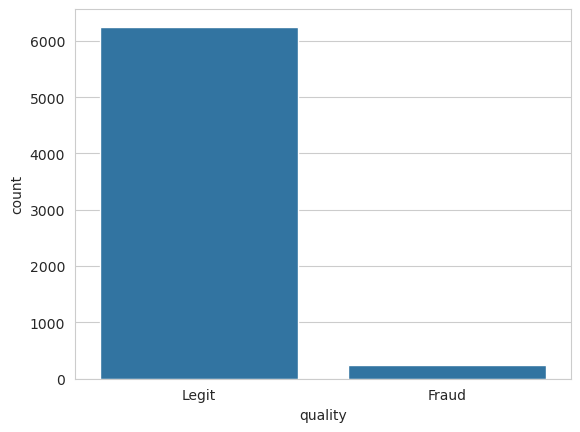

In [178]:
sns.countplot(x='quality',data=df)

<Axes: xlabel='type', ylabel='count'>

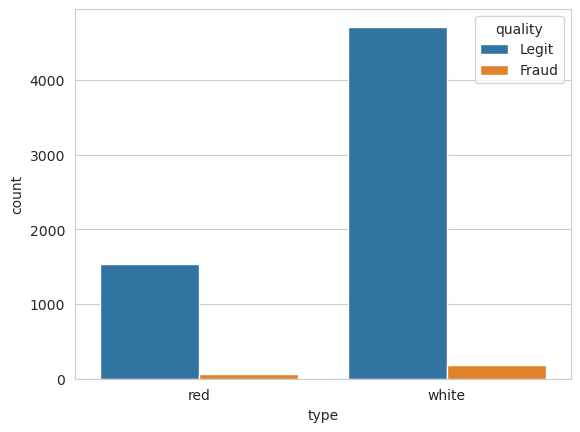

In [179]:
sns.countplot(x='type',hue='quality',data=df)

In [180]:
reds = df[df["type"]=='red']
whites = df[df["type"]=='white']
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

3.9399624765478425
3.7362188648427925


In [185]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [187]:
df.corr(numeric_only=True)['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

<Axes: >

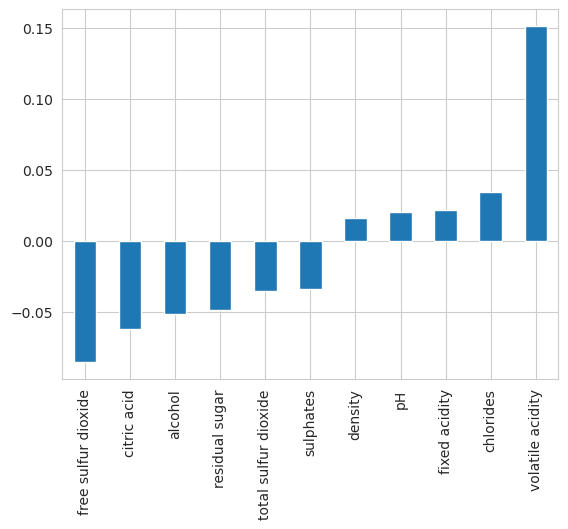

In [189]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

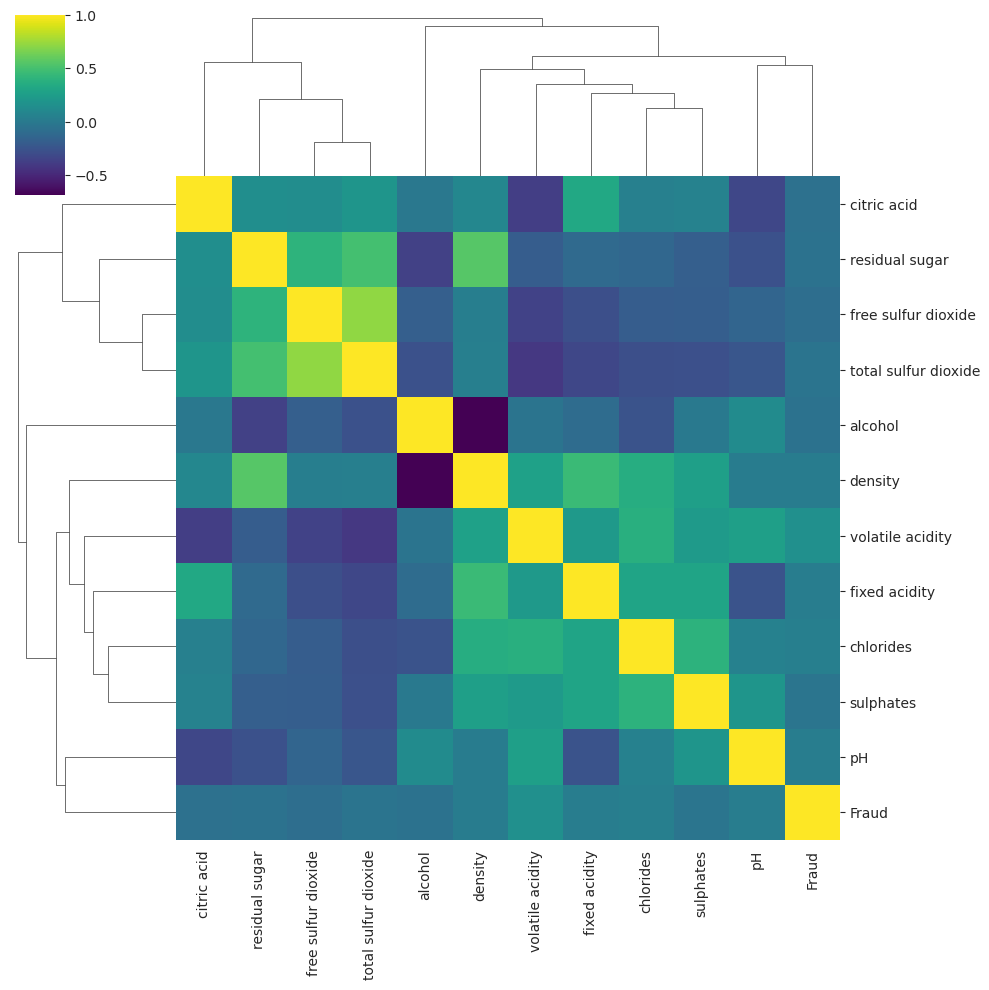

In [192]:
sns.clustermap(df.corr(numeric_only=True),cmap='viridis')

In [193]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [194]:
df = df.drop('Fraud',axis=1)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [203]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [204]:
svr = SVR()

In [205]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svr,param_grid)

In [206]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [207]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict using the best model from GridSearchCV
grid_preds = grid.predict(scaled_X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, grid_preds)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, grid_preds)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4.606437553692728
Mean Squared Error: 40.85062434393098
Root Mean Squared Error: 6.391449314821403
